# P01

In [1]:
section_fig_main_title = 'P01_'

In [2]:
!which python

In [3]:
import sys
print(sys.executable)


/Users/amin/anaconda3/bin/python


In [4]:
import os, sys
import requests
from urllib.parse import urljoin, urlparse
# from bs4 import BeautifulSoup as bs
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pandas.plotting import lag_plot

from tensorflow import keras

from sklearn.metrics import r2_score
from math import sqrt
import json

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
# !/Users/amin/Desktop/proj/env/bin/python -m pip install xgboost

from sklearn.metrics import r2_score,mean_absolute_error

# !/Users/amin/anaconda3/bin/python -m pip install --upgrade tensorflow 
# pip install --upgrade tensorflow 

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

import math
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from pandas.plotting import autocorrelation_plot
import gif

/Users/amin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/amin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/amin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/amin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

In [5]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

import tensorflow as tf
print(tf.__version__)

import gif
from tqdm import tqdm

from sklearn import metrics
# import statsmoadels.api as sm

1.13.1


## Read Data 

Using data from part 02_03 EDA.

In [18]:
csv_path = "../Data/Data_ICME_Edited_Decoded_out_P02_03.csv"
df = pd.read_csv(csv_path, infer_datetime_format=True)


df['ICME Plasma/Field Start Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field Start Y/M/D (UT) (b)'])
df['ICME Plasma/Field End Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field End Y/M/D (UT) (b)'])


df.index = df['ICME Plasma/Field Start Y/M/D (UT) (b)']
df = df.drop(columns=['ICME Plasma/Field Start Y/M/D (UT) (b)'])
df = df.drop(columns=['ICME Plasma/Field End Y/M/D (UT) (b)'])

In [8]:
df.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,
1996-05-27 15:00:00,1,2,1,370,400,9,3,117,1.375000
1996-07-01 18:00:00,1,4,44,360,370,11,3,78,0.583333
1996-08-07 12:00:00,1,2,2,350,380,7,3,88,0.791667
1996-12-23 17:00:00,1,2,22,360,420,10,3,69,1.625000
1997-01-10 04:00:00,3,1,4,450,460,14,3,191,0.791667


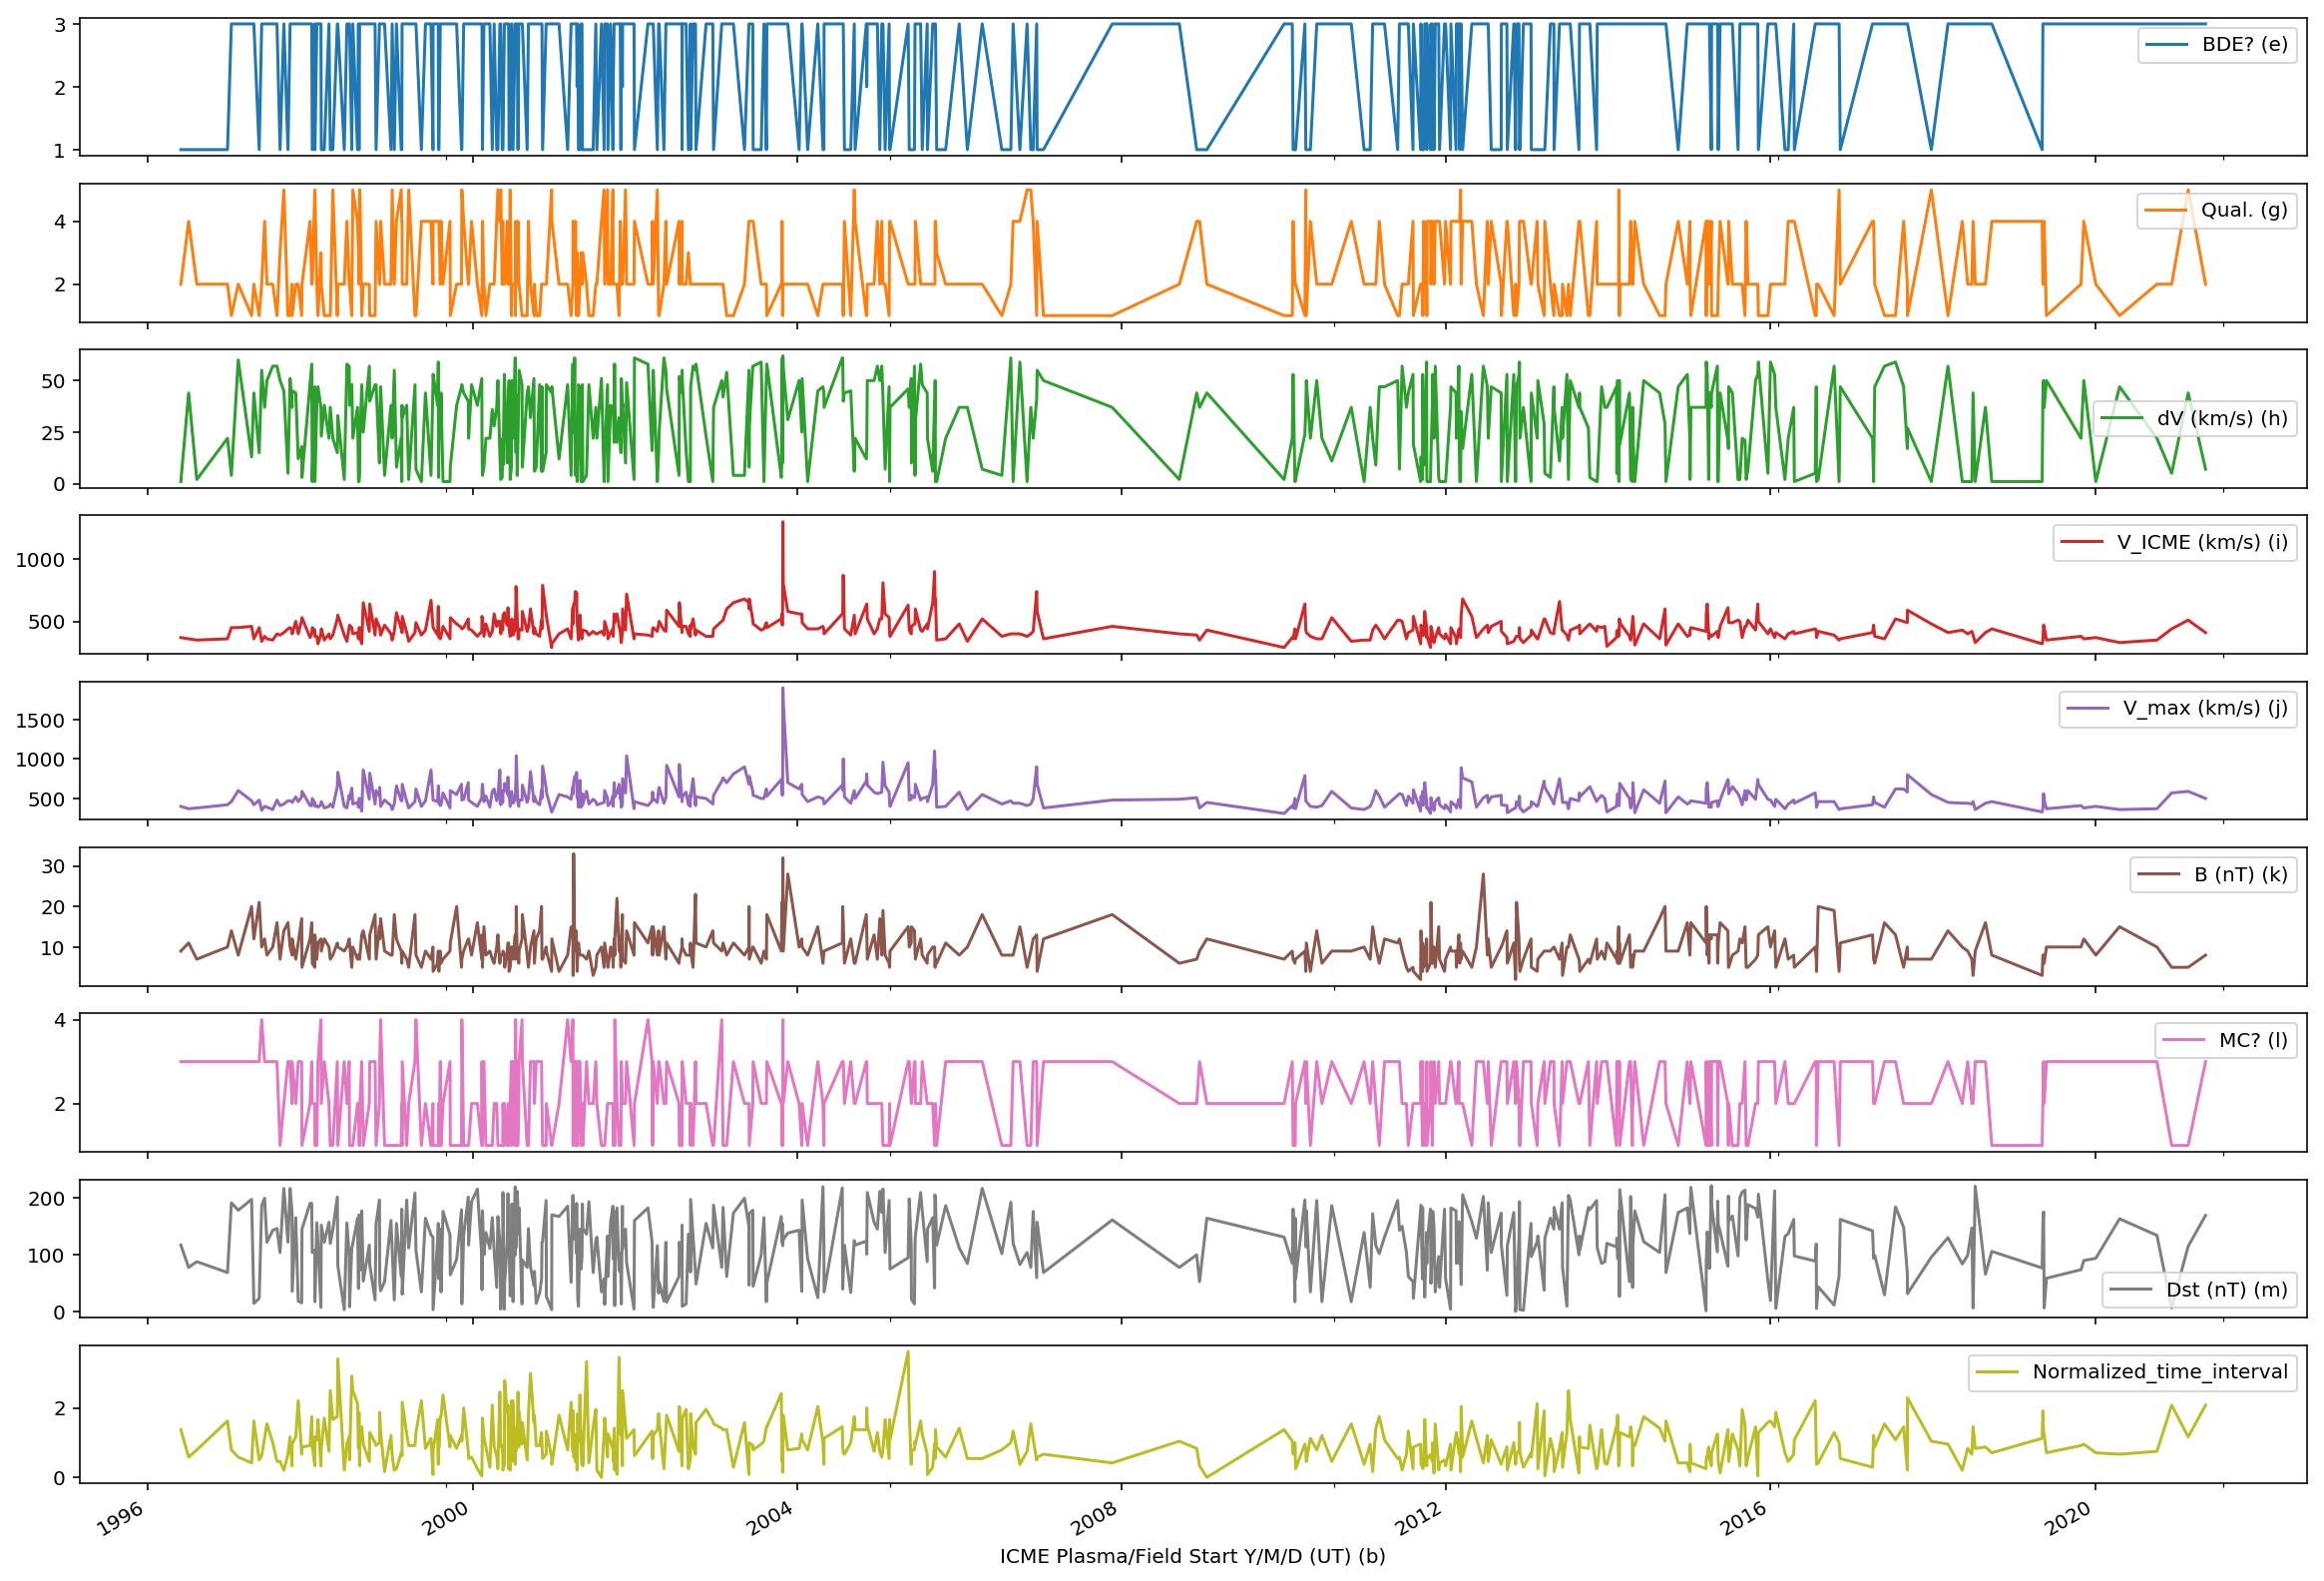

In [9]:
df.plot(subplots=True, figsize=(20,15))
plt.show()

In [10]:
df.columns

Index(['BDE? (e)', 'Qual. (g)', 'dV (km/s) (h)', 'V_ICME (km/s) (i)',
       'V_max (km/s) (j)', 'B (nT) (k)', 'MC? (l)', 'Dst (nT) (m)',
       'Normalized_time_interval'],
      dtype='object')

In [11]:
keep_cols = ['BDE? (e)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'Normalized_time_interval']
df = df[keep_cols]
df.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,
1996-05-27 15:00:00,1,2,1,370,9,3,117,1.375000
1996-07-01 18:00:00,1,4,44,360,11,3,78,0.583333
1996-08-07 12:00:00,1,2,2,350,7,3,88,0.791667
1996-12-23 17:00:00,1,2,22,360,10,3,69,1.625000
1997-01-10 04:00:00,3,1,4,450,14,3,191,0.791667


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 493 entries, 1996-05-27 15:00:00 to 2021-05-12 15:00:00
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BDE? (e)                  493 non-null    int64  
 1   Qual. (g)                 493 non-null    int64  
 2   dV (km/s) (h)             493 non-null    int64  
 3   V_ICME (km/s) (i)         493 non-null    int64  
 4   B (nT) (k)                493 non-null    int64  
 5   MC? (l)                   493 non-null    int64  
 6   Dst (nT) (m)              493 non-null    int64  
 7   Normalized_time_interval  493 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 34.7 KB


In [13]:
df.corr().T

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
BDE? (e),1.000000,-0.144482,0.067712,0.187825,0.207502,0.130491,-0.003364,0.100129
Qual. (g),-0.144482,1.000000,-0.093310,-0.121396,-0.320273,-0.341033,-0.019219,-0.122643
dV (km/s) (h),0.067712,-0.093310,1.000000,0.074620,0.169528,0.136470,0.052603,-0.011099
V_ICME (km/s) (i),0.187825,-0.121396,0.074620,1.000000,0.228757,-0.062064,0.115497,0.027208
B (nT) (k),0.207502,-0.320273,0.169528,0.228757,1.000000,0.429072,0.031962,-0.128620
MC? (l),0.130491,-0.341033,0.136470,-0.062064,0.429072,1.000000,-0.009065,0.011706
Dst (nT) (m),-0.003364,-0.019219,0.052603,0.115497,0.031962,-0.009065,1.000000,-0.081116
Normalized_time_interval,0.100129,-0.122643,-0.011099,0.027208,-0.128620,0.011706,-0.081116,1.000000


# Independent parameters and decoded values:

**Dst:**

Dst index is an index of magnetic activity derived from a network of near-equatorial geomagnetic observatories.
The Dst (Disturbance storm time) index is a measurement of earth geomagnetic activity and is widely used to characterize the geomagnetic storm. [ref](https://ui.adsabs.harvard.edu/abs/2012Ap%26SS.337...23B/abstract)

The minimum value of the geomagnetic Dst index during the period between the disturbance and ICME trailing edge (or slightly thereafter if storm peak is generated by the trailing regions of the ICME). 'P' indicates a "provisional" value, and 'Q' that real time ("quicklook") data from the WDC for Geomagnetism, Kyoto, are used. (Note that quicklook Dst values at the WDC are revised after they are initially posted, so the quoted values for recent ICMEs may be subject to revision.) Otherwise values are "final". See Zhang et al. [2007] for a discussion of the solar and interplanetary drivers of the intense (Dst ≤-100 nT) geomagnetic storms during 1996-2005.


```{'Dst (nT) (m)': {'+1': 1, '+16 P': 2, '+9': 3, '-1': 4, '-10': 5, '-10 P': 6, '-10 Q': 7, '-100': 8, '-101': 9, '-102': 10, '-104': 11, '-104 P': 12, '-105': 13, '-106': 14, '-107': 15, '-108': 16, '-109': 17, '-11': 18, '-110': 19, '-110 P': 20, '-112': 21, '-113': 22, '-114': 23, '-115': 24, '-117': 25, '-118': 26, '-119': 27, '-12': 28, '-122': 29, '-122 Q': 30, '-123': 31, '-124Q': 32, '-127': 33, '-129': 34, '-13': 35, '-130': 36, '-131': 37, '-132': 38, '-133': 39, '-136': 40, '-138': 41, '-139': 42, '-14': 43, '-14 P': 44, '-141': 45, '-143': 46, '-144': 47, '-145': 48, '-146': 49, '-147': 50, '-148': 51, '-149': 52, '-15': 53, '-155': 54, '-155 P': 55, '-157': 56, '-159': 57, '-16': 58, '-16 Q': 59, '-162': 60, '-166': 61, '-17': 62, '-17 P': 63, '-170': 64, '-173': 65, '-174 Q': 66, '-176': 67, '-17Q': 68, '-18': 69, '-181': 70, '-182': 71, '-187': 72, '-19': 73, '-19 Q': 74, '-2': 75, '-2 P': 76, '-2 Q': 77, '-20': 78, '-201': 79, '-204 P': 80, '-205': 81, '-207': 82, '-21': 83, '-21 Q': 84, '-22': 85, '-221': 86, '-223 P': 87, '-23': 88, '-23 P': 89, '-23 Q': 90, '-235': 91, '-237': 92, '-24': 93, '-24 Q': 94, '-247': 95, '-24Q': 96, '-25': 97, '-25 P': 98, '-25 Q': 99, '-26': 100, '-263': 101, '-27': 102, '-271': 103, '-28': 104, '-28 P': 105, '-28 Q': 106, '-288': 107, '-29': 108, '-29 P': 109, '-292': 110, '-3': 111, '-30': 112, '-301': 113, '-31': 114, '-31 Q': 115, '-32': 116, '-33': 117, '-34': 118, '-34 P': 119, '-35': 120, '-353': 121, '-36': 122, '-37': 123, '-374': 124, '-38': 125, '-38 P': 126, '-383': 127, '-387': 128, '-39': 129, '-39 Q': 130, '-4': 131, '-4 P': 132, '-40': 133, '-40 Q': 134, '-41': 135, '-42': 136, '-42 P': 137, '-422': 138, '-43': 139, '-43 P': 140, '-44 P': 141, '-44 Q': 142, '-45': 143, '-46': 144, '-47': 145, '-48': 146, '-48 Q': 147, '-48Q': 148, '-49': 149, '-5': 150, '-50': 151, '-51': 152, '-51 P': 153, '-51 Q': 154, '-52': 155, '-55': 156, '-56': 157, '-57': 158, '-57 P': 159, '-58': 160, '-59': 161, '-59 P': 162, '-59 Q': 163, '-6': 164, '-60': 165, '-60 P': 166, '-61': 167, '-61 P': 168, '-61 Q': 169, '-62': 170, '-62 P': 171, '-63': 172, '-64': 173, '-65': 174, '-65 Q': 175, '-66': 176, '-67': 177, '-68': 178, '-69': 179, '-7': 180, '-7 P': 181, '-71': 182, '-72': 183, '-72Q': 184, '-73': 185, '-74': 186, '-75': 187, '-75 P': 188, '-76': 189, '-77': 190, '-78': 191, '-79': 192, '-8': 193, '-8 P': 194, '-80': 195, '-81': 196, '-82': 197, '-83': 198, '-84': 199, '-84 P': 200, '-85': 201, '-86': 202, '-86 P': 203, '-87': 204, '-88': 205, '-89 P': 206, '-90': 207, '-91': 208, '-92': 209, '-92 P': 210, '-93': 211, '-93 P': 212, '-94 P': 213, '-95': 214, '-97': 215, '-98': 216, '-99': 217, '-99 P': 218, '0': 219, '0 Q': 220, '1 P': 221}}```




**B (nT):**

(k) Mean magnetic field strength in the ICME, based on the interval from (b) to (c), to the nearest 1 nT.

**MC:**

'2' indicates that a magnetic cloud has been reported in association with the ICME (see (d) above) or (occasionally, or for recent events) that by our assessment, the ICME has the clear features of a magnetic cloud but a magnetic cloud may not have been reported. 'H' indicates an event reported by Huttunen et al. Ann Geophys. (2005) 23:1-17 that is not listed by Lepping. '1' indicates that the ICME shows evidence of a rotation in field direction, but lacks some other characteristics of a magnetic cloud, for example an enhanced magnetic field. '0' indicates that the ICME is not a reported magnetic cloud, and lacks most of the typical features of a magnetic cloud, such as a smoothly rotating, enhanced magnetic field.

```{'MC? (l)': {'0': 1, '1': 2, '2': 3, '2H': 4}}, ```

**dv:**

Increase in solar wind speed at the upstream disturbance (shock/wave) estimated from 1 hour averaged solar wind data. 'S' indicates that a forward fast shock has been reported in the ACE List of Disturbances and Transients or Kasper Shock list (including ACE and WIND observations).


```{'dV (km/s) (h)': {'0': 1, '10': 2, '100': 3, '100 S': 4, '110': 5, '110 S': 6, '120': 7, '120 S': 8, '130': 9, '130 S': 10, '140': 11, '140 S': 12, '150': 13, '150  S': 14, '150 S': 15, '160 S': 16, '170': 17, '170 S': 18, '180': 19, '180 S': 20, '190': 21, '20': 22, '20 S': 23, '200': 24, '200 S': 25, '210 S': 26, '220': 27, '220 S': 28, '230': 29, '230 S': 30, '240 S': 31, '250 S': 32, '250 Wv': 33, '260 S': 34, '270': 35, '280': 36, '30': 37, '30 S': 38, '300  S': 39, '300 S': 40, '320 S': 41, '340 S': 42, '350 S': 43, '40': 44, '40 S': 45, '400 S': 46, '50': 47, '50 S': 48, '550 S': 49, '60': 50, '60 S': 51, '650 S': 52, '70': 53, '70  S': 54, '70 S': 55, '750 S': 56, '80': 57, '80 S': 58, '90': 59, '90  S': 60, '90 S': 61, '900 S': 62}}, ```




**Qual:**

The "quality" of the boundary times (`1' indicating the most reliable) based on assessment of the various data sets, including plasma, magnetic field and solar wind composition/charge states. 'W' indicates that the overall ICME signatures are particularly weak.



```'Qual. (g)': {'1': 1, '2': 2, '2W': 3, '3': 4, '3W': 5}```

In [14]:
df.columns

Index(['BDE? (e)', 'Qual. (g)', 'dV (km/s) (h)', 'V_ICME (km/s) (i)',
       'B (nT) (k)', 'MC? (l)', 'Dst (nT) (m)', 'Normalized_time_interval'],
      dtype='object')

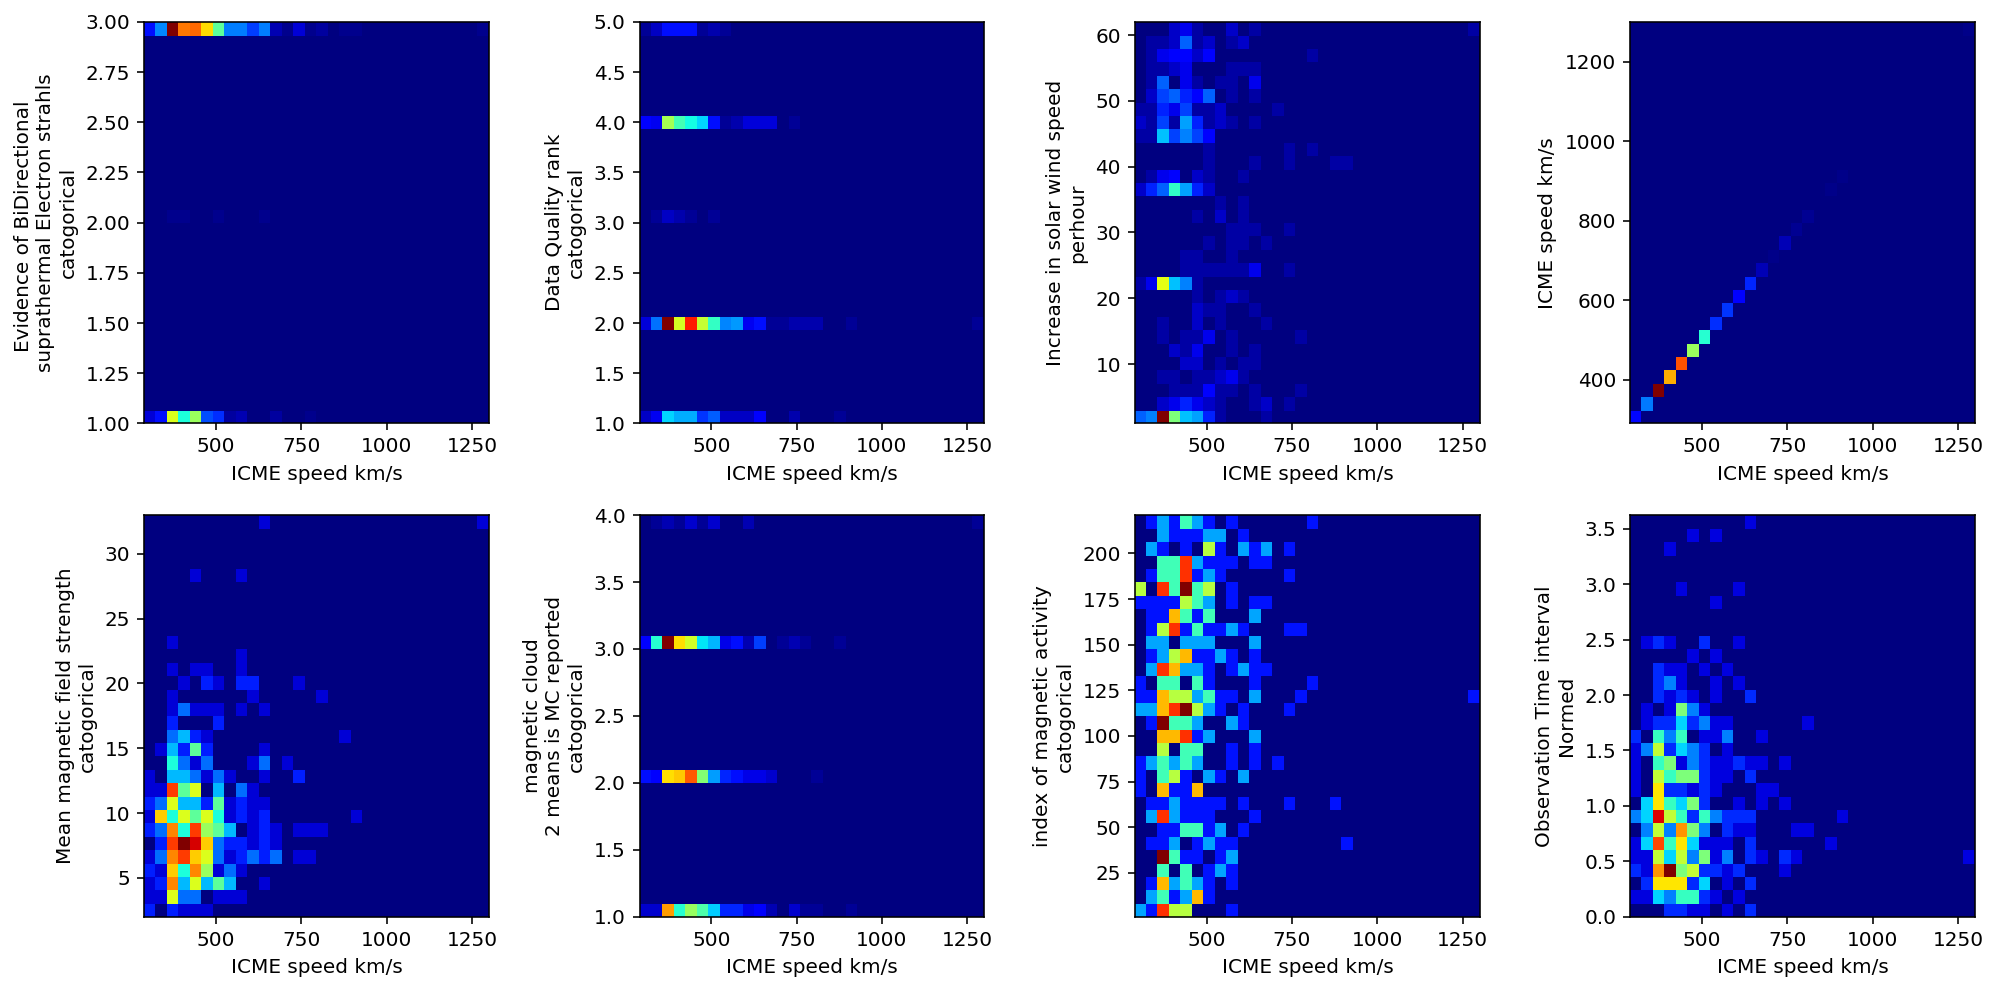

In [15]:
column_names = ['Evidence of BiDirectional \nsuprathermal Electron strahls\ncatogorical', 
                'Data Quality rank\ncatogorical', 'Increase in solar wind speed\nperhour', 
                'ICME speed km/s', 'Mean magnetic field strength\ncatogorical', 
                'magnetic cloud\n2 means is MC reported\ncatogorical', 
                'index of magnetic activity\ncatogorical', 
                'Observation Time interval\nNormed']


plt.figure(figsize=(14,7))
for i,col in enumerate(df.columns):
    
    plt.subplot(2,4,i+1)
    plt.hist2d(df['V_ICME (km/s) (i)'], df[col], 
               bins=30,cmap='jet')
    plt.xlabel('ICME speed km/s')
    plt.ylabel(column_names[i])
    
    
plt.tight_layout()
plt.savefig('../Figures/neat_hist2d.png')
plt.show()
    

In [16]:
df.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,
1996-05-27 15:00:00,1,2,1,370,9,3,117,1.375000
1996-07-01 18:00:00,1,4,44,360,11,3,78,0.583333
1996-08-07 12:00:00,1,2,2,350,7,3,88,0.791667
1996-12-23 17:00:00,1,2,22,360,10,3,69,1.625000
1997-01-10 04:00:00,3,1,4,450,14,3,191,0.791667


# Hypothesis Questions

In [19]:
csv_path = "../Data/Data_ICME_Edited_out_P02_02.csv"
df = pd.read_csv(csv_path, infer_datetime_format=True)


df['ICME Plasma/Field Start Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field Start Y/M/D (UT) (b)'])
df['ICME Plasma/Field End Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field End Y/M/D (UT) (b)'])


df.index = df['ICME Plasma/Field Start Y/M/D (UT) (b)']
df = df.drop(columns=['ICME Plasma/Field Start Y/M/D (UT) (b)'])
df = df.drop(columns=['ICME Plasma/Field End Y/M/D (UT) (b)'])

In [21]:
df.columns

Index(['Disturbance Y/M/D (UT) (a)',
       'Comp. Start (Hrs wrt. Plasma/ Field) (c)',
       'Comp. End (Hrs wrt. Plasma/ Field) (c)',
       'MC Start (Hrs wrt. Plasma/ Field) (d)',
       'End (Hrs wrt. Plasma/ Field) (d)', 'BDE? (e)', 'BIF? (f)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'V_transit (km/s) (n)',
       'LASCO CME Y/M/D (UT) (o)'],
      dtype='object')

## BDE

Evidence of BiDirectional suprathermal Electron strahls (BDE) in ACE/SWEPAM Observations. If data are unavailable from SWEPAM (data commence on 10/22/97), observations from the 3-D P instrument on WIND are referred to. "SEP" indicates that an intense solar energetic particle event was in progress at the time of ICME passage and electron flows therefore cannot be determined.

[Reference](http://www.srl.caltech.edu/ACE/ASC/DATA/level3/icmetable2.htm#(e))

In [89]:
col1 = 'BDE? (e)'
col2_numer = 'V_ICME (km/s) (i)'

print('num of uniq', col1 ,'\n', df[col1].unique())

df[col1].unique()

num of uniq BDE? (e) 
 ['N' 'Y' '...' 'SEP']


array(['N', 'Y', '...', 'SEP'], dtype=object)

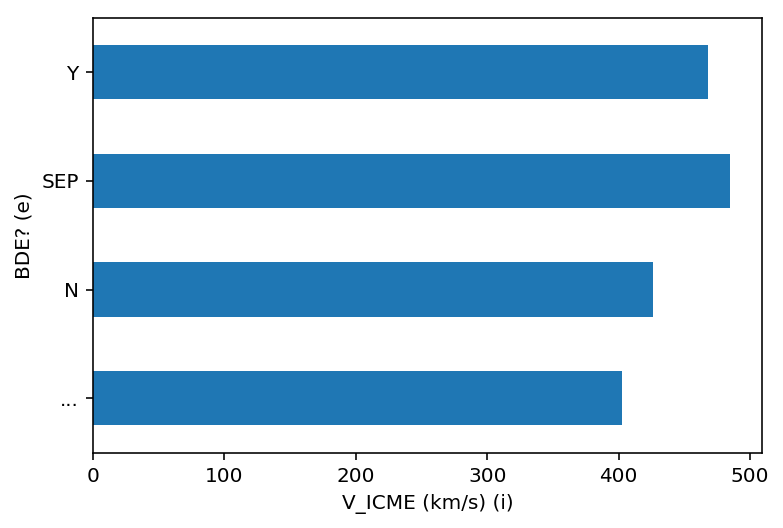

In [112]:
target_grp = df.groupby([col1])

sub_df = target_grp[col2_numer]
target_grp[col2_numer].mean().plot.barh()
plt.xlabel(col2_numer)
plt.show()

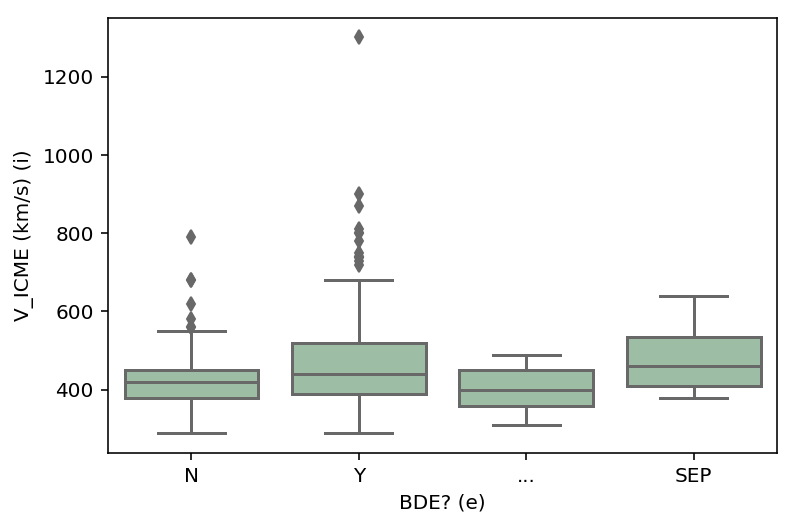

In [103]:
# https://www.reneshbedre.com/blog/anova.html
ax = sns.boxplot(x=col1, y=col2_numer, data=df, color='#99c2a2')
# ax = sns.swarmplot(x=col1, y=col2_numer, data=df, color='#7d0013')
plt.show()

In [157]:
ICME_V_BDE_Y = df[df['BDE? (e)'] == 'Y']['V_ICME (km/s) (i)']
ICME_V_BDE_N = df[df['BDE? (e)'] == 'N']['V_ICME (km/s) (i)']
ICME_V_BDE_SEP = df[df['BDE? (e)'] == 'SEP']['V_ICME (km/s) (i)']

In [158]:
print(ICME_V_BDE_Y.mean())
print(ICME_V_BDE_N.mean())
print(ICME_V_BDE_SEP.mean())

468.2369942196532
426.02649006622516
485.0


From the above plot, it seems that I can infer that the solar speed for those data that there is evidence of bi-directional suprathermal electron (Y) is higher in average compared to those that there no evidence reported. is a difference in average solar wind speed observed from data statistically significant?


<span style="color:gray">
    
H0: Nothing extraordinary going on! The average solar wind speed is constant whether there are Bidirectional suprathermal Electron strahls happen or Not.
</span>


<span style="color:blue">
H1: Average solar wind speed is higher when Bidirectional suprathermal Electron strahls happen!
</span>

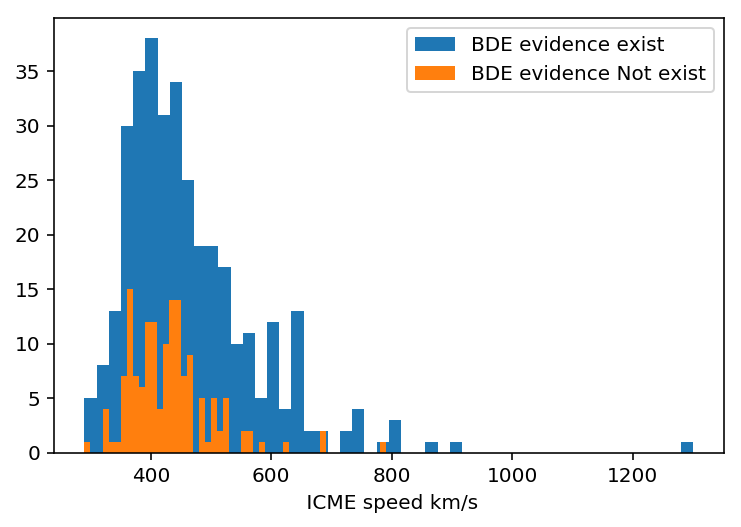

In [154]:
plt.hist(ICME_V_BDE_Y, bins=50, label='BDE evidence exist')
plt.hist(ICME_V_BDE_N, bins=50, label='BDE evidence Not exist')
plt.xlabel(' ICME speed km/s')
plt.legend()
plt.show()


In [125]:
import scipy.stats as stats
stats.ttest_1samp(a = ICME_V_BDE_Y ,popmean=ICME_V_BDE_N.mean())

Ttest_1sampResult(statistic=6.935177177547327, pvalue=2.009099864195088e-11)

The p-value is less than 0.05 therefore we can reject the null hypothesis (H0) and accept that there is a significant difference between the solar storm speed (ICME speed) when there is evidence of BDE with when there is no BDE evidence. In another word, the H1 is correct.

<span style="color:green">
    
H1: Average solar wind speed is higher when Bidirectional suprathermal Electron strahls happen.

</span>

# "quality" of the boundary times

The "quality" of the boundary times (`1' indicating the most reliable) based on assessment of the various data sets, including plasma, magnetic field and solar wind composition/charge states. 'W' indicates that the overall ICME signatures are particularly weak.

[Reference](http://www.srl.caltech.edu/ACE/ASC/DATA/level3/icmetable2.htm#(e))

num of uniq Qual. (g)   
 ['2' '3' '1' '2W' '3W']


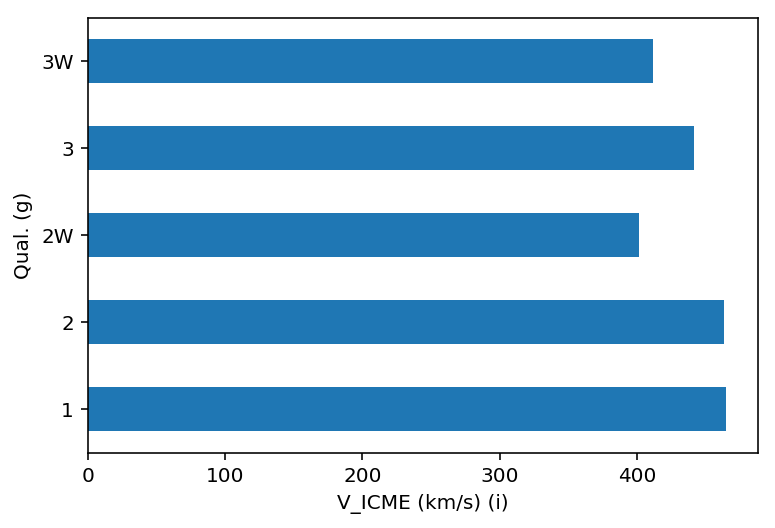

In [58]:
col1 = 'Qual. (g)'
col2_numer = 'V_ICME (km/s) (i)'

print('num of uniq', col1 ,'  \n', df[col1].unique())

df[col1].unique()

target_grp = df.groupby([col1])

target_grp[col2_numer].mean().plot.barh()
plt.xlabel(col2_numer)
plt.show()

num of uniq BIF? (f)   
 ['...' 'Y' 'N' '..']


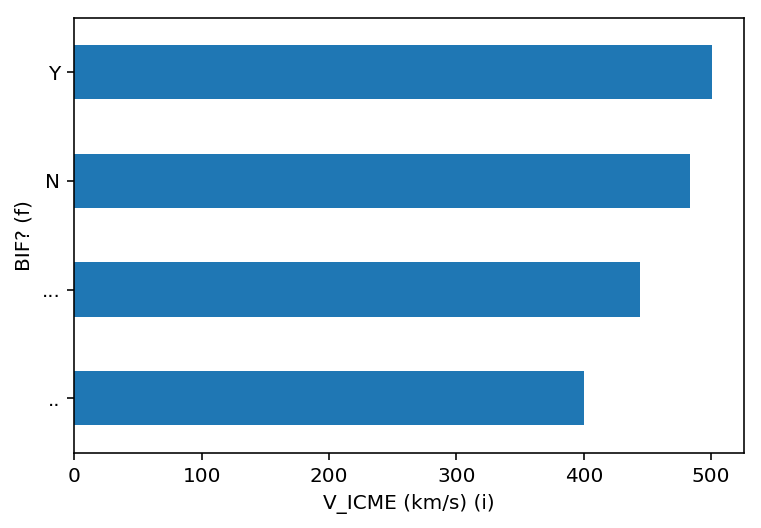

In [59]:
col1 = 'BIF? (f)'
col2_numer = 'V_ICME (km/s) (i)'

print('num of uniq', col1 ,'  \n', df[col1].unique())

df[col1].unique()

target_grp = df.groupby([col1])

target_grp[col2_numer].mean().plot.barh()
plt.xlabel(col2_numer)
plt.show()

num of uniq B (nT) (k)   
 [ 9 11  7 10 14  8 20 12 21 16 17  5  6 13 18 15  4  3 33 22 23 19 32 28
  2]


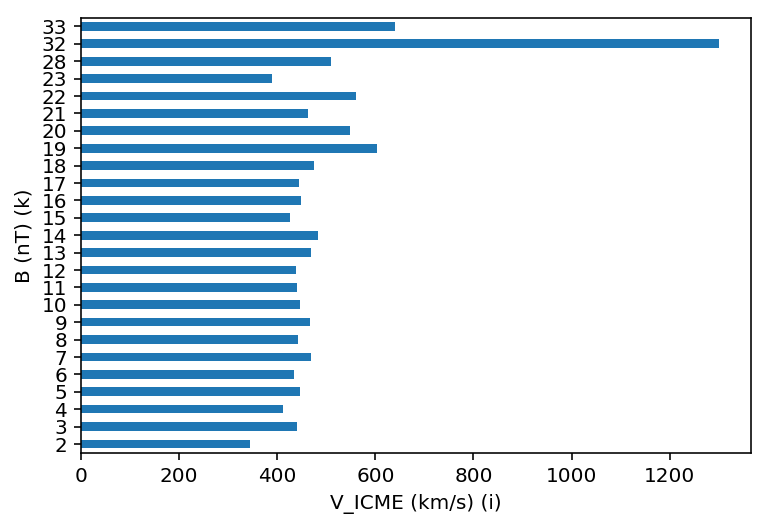

In [61]:
col1 = 'B (nT) (k)'
col2_numer = 'V_ICME (km/s) (i)'

print('num of uniq', col1 ,'  \n', df[col1].unique())

df[col1].unique()

target_grp = df.groupby([col1])

target_grp[col2_numer].mean().plot.barh()
plt.xlabel(col2_numer)
plt.show()

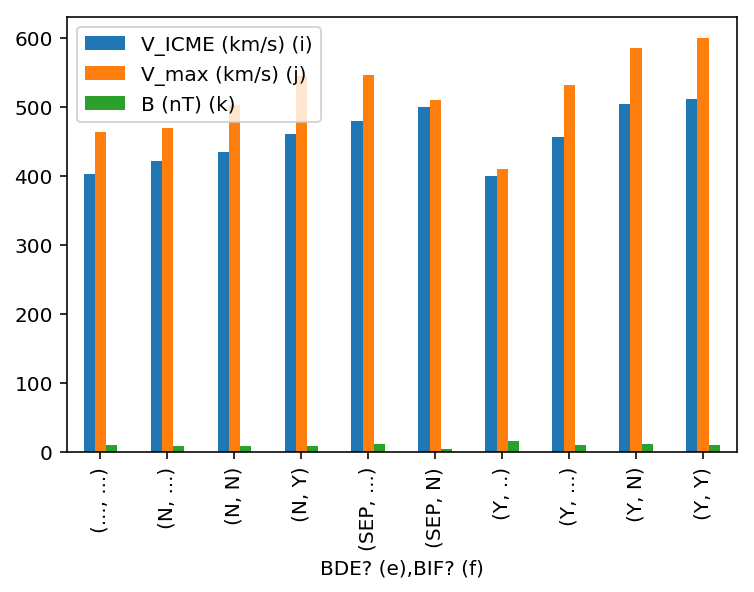

In [85]:
df.groupby(['BDE? (e)', 'BIF? (f)']).mean().plot.bar()